# How are in-demand skills trending for Data Analysts?

#### Methology
    1. Aggregate skill counts monthly
    2. Re-analyze based on percentage of total jobs
    3. Plot the monthly skill demand

In [ ]:
import pandas as pd
import ast
from datasets import load_dataset
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
#Load dataset
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#Cleanup Dataset
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)
df.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"[python, sql, c#, azure, airflow, dax, docker,...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"[python, c++, java, matlab, aws, tensorflow, k...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"[bash, python, oracle, aws, ansible, puppet, j...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."


In [7]:
df_DA = df[(df['job_title_short'] == "Data Analyst")].copy()
df_DA

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
12,Data Analyst,Stagiaire Data Analyst (H/F) - Lyon (69006),"Lyon, France",via Jobijoba,Full-time and Internship,False,France,2023-12-22 13:24:41,False,False,France,None,NaN,NaN,Engie,"[sql, php, excel, power bi, sap, jira]","{'analyst_tools': ['excel', 'power bi', 'sap']..."
18,Data Analyst,Data Analyst,"Warsaw, Poland",via Praca Trabajo.org,Full-time,False,Poland,2023-10-16 13:36:54,False,False,Poland,None,NaN,NaN,Glovo,"[sql, python, r, redshift, pandas, excel, look...","{'analyst_tools': ['excel', 'looker', 'tableau..."
31,Data Analyst,Stage - Data Analyst F/H,"Paris, France",via LinkedIn,Full-time and Internship,False,France,2023-10-19 13:59:31,False,False,France,None,NaN,NaN,GROUPE BON MARCHÉ : Le Bon Marché Rive Gauche ...,[sql],{'programming': ['sql']}
34,Data Analyst,Data Analyst als Marketing Manager Automation ...,"Erlangen, Germany",via Central Illinois Proud Jobs,Full-time,False,Germany,2023-02-23 13:31:28,True,False,Germany,None,NaN,NaN,DEFACTO GmbH,[sap],{'analyst_tools': ['sap']}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785703,Data Analyst,Data Analyst - CRYPTOGRAPHY - Full-time,Anywhere,via Snagajob,Full-time,True,"Texas, United States",2023-01-28 06:02:55,True,False,United States,None,NaN,NaN,Axelon Services Corporation,None,None
785705,Data Analyst,Expert Business Data Analyst - Now Hiring,"Oakland, CA",via Snagajob,Full-time,False,"California, United States",2023-01-09 06:00:25,False,False,United States,None,NaN,NaN,PG&E Corporation,"[sql, python, tableau]","{'analyst_tools': ['tableau'], 'programming': ..."
785715,Data Analyst,Amul Careers 2023 - Apply Online - Data Analys...,India,melalui Jobsleworld - Jobs In India - Job Vaca...,Pekerjaan tetap,False,India,2023-03-13 06:16:28,False,False,India,None,NaN,NaN,Amul,None,None
785717,Data Analyst,Data & Analytics Architect (w/m/x),"Erfurt, Jerman",melalui LinkedIn,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,NTT DATA DACH,"[aws, azure]","{'cloud': ['aws', 'azure']}"


In [15]:
df_DA['job_posted_month_no'] = df_DA['job_posted_date'].dt.month
df_DA_explode = df_DA.explode('job_skills')

,job_skills,job_posted_month_no
1,r,1
1,python,1
1,sql,1
1,nosql,1
1,power bi,1
...,...,...
785717,azure,3
785737,sas,3
785737,sas,3
785737,sql,3


In [26]:
df_DA_pivot = df_DA_explode.pivot_table(index='job_posted_month_no', columns='job_skills', aggfunc='size', fill_value=0)
df_DA_pivot.loc['Total'] = df_DA_pivot.sum()
df_DA_pivot = df_DA_pivot[df_DA_pivot.loc['Total'].sort_values(ascending=False).index]
df_DA_pivot = df_DA_pivot.drop('Total')
df_DA_pivot

job_skills,sql,excel,python,tableau,power bi,r,sas,powerpoint,word,sap,azure,oracle,aws,sql server,go,flow,vba,looker,snowflake,qlik,java,spark,jira,spss,javascript,alteryx,hadoop,sharepoint,outlook,bigquery,dax,gcp,mysql,databricks,sheets,ssis,c,git,pandas,ssrs,...,firestore,mlr,colocation,svelte,heroku,nuix,ionic,react.js,asp.net core,hugging face,objective-c,play framework,clojure,pascal,microsoft lists,debian,sqlserver,theano,qt,lisp,codecommit,blazor,f#,kali,couchdb,next.js,haskell,shogun,pulumi,mattermost,angular.js,xamarin,gtx,nuxt.js,ovh,esquisse,suse,capacitor,chainer,msaccess
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,11336,8170,6606,5596,4285,3607,3830,1880,1778,1251,1288,1304,1077,1130,1002,954,839,695,597,682,691,626,639,631,578,551,607,499,502,443,408,396,377,341,389,430,389,363,301,386,...,4,1,3,0,2,0,1,1,1,0,0,3,0,0,0,1,2,0,0,1,1,0,1,0,0,0,0,3,0,0,2,0,0,1,0,0,0,1,0,0
2,7947,5772,4751,3936,3307,2576,2634,1291,1235,954,987,942,761,739,680,683,625,522,542,575,426,398,417,374,390,448,377,354,360,290,270,275,286,244,232,314,255,208,186,275,...,0,1,0,1,0,0,1,1,0,0,0,2,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,7868,5675,4741,4051,3176,2650,2554,1266,1203,892,887,820,705,654,651,573,595,530,506,479,411,407,413,405,408,442,387,405,375,300,269,255,319,177,192,255,262,216,223,214,...,0,1,1,0,2,0,1,3,0,1,1,2,1,1,1,2,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
4,7553,5496,4557,3776,3106,2399,2598,1190,1177,947,832,868,720,686,669,584,617,473,543,497,449,421,375,397,348,413,369,360,345,270,251,292,275,234,240,259,231,220,212,229,...,0,1,0,2,2,0,2,2,1,0,0,2,3,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
5,6617,4773,4070,3245,2695,2093,1940,979,957,851,727,746,603,603,616,478,497,409,421,459,380,341,323,308,296,310,314,294,275,229,226,254,249,190,241,223,214,217,195,194,...,2,0,2,2,3,1,0,0,0,0,3,0,1,0,1,2,0,0,1,0,1,1,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,1
6,7584,5724,4707,3812,3275,2442,2174,1173,1237,987,915,824,770,581,675,622,624,526,549,513,386,381,394,372,360,393,331,333,355,289,256,282,265,258,283,265,222,249,295,225,...,1,2,3,1,0,0,0,2,0,1,1,0,0,0,0,0,3,1,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,7687,5513,4831,3928,3350,2444,2118,1096,1069,996,949,909,778,692,655,634,574,526,527,455,442,413,367,362,388,366,324,310,329,256,285,293,270,279,288,230,239,254,279,230,...,0,1,0,2,0,0,0,1,0,3,2,0,0,2,0,0,1,0,1,1,1,0,0,0,0,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0
8,8823,6482,5576,4533,3859,2975,2560,1332,1298,1117,1035,990,924,868,713,710,670,554,596,483,475,501,496,439,474,413,358,405,387,315,332,294,267,351,320,292,334,291,285,281,...,3,2,0,0,1,0,0,2,3,1,0,1,3,0,1,1,1,0,1,3,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
9,6829,4886,4229,3446,3118,2146,1880,944,945,852,821,738,717,600,541,531,471,505,473,396,336,372,370,371,362,317,318,294,320,234,296,251,241,259,242,190,206,210,231,181,...,1,0,0,0,0,3,0,0,0,0,2,0,0,2,2,0,0,2,0,3,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [30]:
total_months = df_DA.groupby('job_posted_month_no').size()

In [ ]:
df_DA_percent = df_DA_pivot.div(total_months / 100, 0)

In [33]:
#Change month numer to month names
df_DA_percent = df_DA_percent.reset_index()
df_DA_percent['job_posted_month'] = df_DA_percent['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_DA_percent = df_DA_percent.set_index('job_posted_month')
df_DA_percent = df_DA_percent.drop(columns='job_posted_month_no')
df_DA_percent

job_skills,sql,excel,python,tableau,power bi,r,sas,powerpoint,word,sap,azure,oracle,aws,sql server,go,flow,vba,looker,snowflake,qlik,java,spark,jira,spss,javascript,alteryx,hadoop,sharepoint,outlook,bigquery,dax,gcp,mysql,databricks,sheets,ssis,c,git,pandas,ssrs,...,firestore,mlr,colocation,svelte,heroku,nuix,ionic,react.js,asp.net core,hugging face,objective-c,play framework,clojure,pascal,microsoft lists,debian,sqlserver,theano,qt,lisp,codecommit,blazor,f#,kali,couchdb,next.js,haskell,shogun,pulumi,mattermost,angular.js,xamarin,gtx,nuxt.js,ovh,esquisse,suse,capacitor,chainer,msaccess
job_posted_month,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Jan,48.064448,34.640661,28.009328,23.726945,18.168327,15.293619,16.239135,7.971168,7.538690,5.304219,5.461098,5.528938,4.566462,4.791181,4.248463,4.044944,3.557346,2.946788,2.531270,2.891668,2.929828,2.654229,2.709349,2.675429,2.450710,2.336231,2.573670,2.115752,2.128471,1.878312,1.729913,1.679033,1.598474,1.445834,1.649353,1.823193,1.649353,1.539114,1.276235,1.636633,...,0.016960,0.004240,0.012720,0.000000,0.008480,0.000000,0.004240,0.004240,0.004240,0.000000,0.000000,0.012720,0.000000,0.000000,0.000000,0.004240,0.008480,0.000000,0.000000,0.004240,0.004240,0.000000,0.004240,0.000000,0.000000,0.000000,0.000000,0.01272,0.000000,0.000000,0.00848,0.000000,0.000000,0.00424,0.000000,0.000000,0.000000,0.00424,0.000000,0.00000
Feb,47.994927,34.859283,28.693079,23.770987,19.972219,15.557434,15.907718,7.796835,7.458630,5.761565,5.960865,5.689093,4.595966,4.463099,4.106776,4.124894,3.774610,3.152555,3.273342,3.472642,2.572774,2.403672,2.518420,2.258727,2.355357,2.705641,2.276845,2.137939,2.174176,1.751419,1.630632,1.660829,1.727262,1.473608,1.401135,1.896364,1.540041,1.256190,1.123324,1.660829,...,0.000000,0.006039,0.000000,0.006039,0.000000,0.000000,0.006039,0.006039,0.000000,0.000000,0.000000,0.012079,0.000000,0.000000,0.000000,0.006039,0.000000,0.000000,0.006039,0.000000,0.000000,0.006039,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000
Mar,48.439328,34.938127,29.187958,24.939974,19.553038,16.314720,15.723696,7.794127,7.406267,5.491596,5.460814,5.048329,4.340331,4.026350,4.007880,3.527673,3.663116,3.262944,3.115188,2.948963,2.530321,2.505695,2.542634,2.493382,2.511851,2.721172,2.382565,2.493382,2.308687,1.846949,1.656098,1.569907,1.963923,1.089700,1.182048,1.569907,1.613003,1.329804,1.372899,1.317491,...,0.000000,0.006156,0.006156,0.000000,0.012313,0.000000,0.006156,0.018469,0.000000,0.006156,0.006156,0.012313,0.006156,0.006156,0.006156,0.012313,0.006156,0.000000,0.006156,0.000000,0.000000,0.006156,0.000000,0.006156,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.006156,0.000000,0.00000,0.000000,0.000000,0.006156,0.00000,0.000000,0.00000
Apr,48.685059,35.426067,29.373469,24.339306,20.020627,15.463452,16.746165,7.670491,7.586696,6.104164,5.362898,5.594946,4.640969,4.421813,4.312234,3.764342,3.977053,3.048859,3.500064,3.203558,2.894160,2.713678,2.417172,2.558979,2.243135,2.662112,2.378497,2.320485,2.223798,1.740364,1.617894,1.882171,1.772592,1.508315,1.546990,1.669460,1.488978,1.418074,1.366508,1.476086,...,0.000000,0.006446,0.000000,0.012892,0.012892,0.000000,0.012892,0.012892,0.006446,0.000000,0.000000,0.012892,0.019337,0.006446,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.006446,0.006446,0.006446,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.006446,0.000000,0.000000,0.00000,0.000000,0.00000
May,49.295985,35.558370,30.321091,24.174924,20.077479,15.592639,14.452805,7.293452,7.129554,6.339864,5.416077,5.557625,4.492289,4.492289,4.589138,3.561052,3.702600,3.047009,3.136408,3.419504,2.830962,2.540416,2.406318,2.294569,2.205170,2.309469,2.339268,2.190270,2.048722,1.706027,1.683677,1.892274,1.855025,1.415481,1.795426,1.661328,1.594278,1.616628,1.452730,1.445280,...,0.014900,0.000

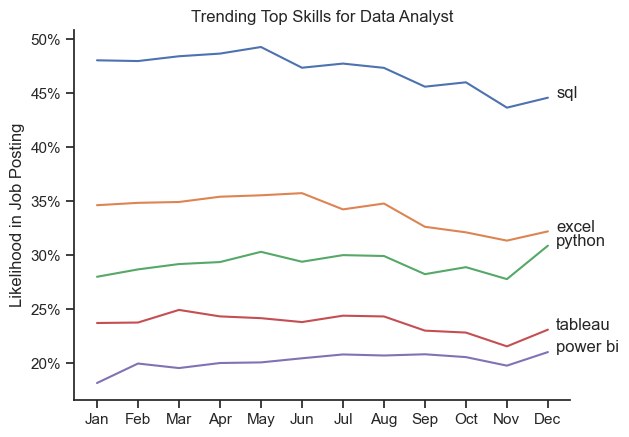

In [58]:
df_plot = df_DA_percent.iloc[:, :5]

sns.lineplot(df_plot, dashes=False)
sns.set_theme(style='ticks')
sns.despine()

plt.title("Trending Top Skills for Data Analyst")
plt.xlabel("")
plt.ylabel("Likelihood in Job Posting")
plt.legend().remove()

from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(PercentFormatter(decimals=0))

for i in range(5):
    plt.text(11.2, df_plot.iloc[-1, i], df_plot.columns[i])